In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('train_yaOffsB.csv')

In [ ]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [ ]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
df['Number_Weeks_Used'].value_counts()

20.0    3878
30.0    3765
25.0    3120
40.0    2707
15.0    2486
        ... 
63.0      50
64.0      44
65.0      31
66.0      17
67.0       8
Name: Number_Weeks_Used, Length: 64, dtype: int64

In [ ]:
a = df['Number_Weeks_Used'].mean()
b = round(a,1)
b
a

28.62397004683313

In [ ]:
df['Number_Weeks_Used'] =df['Number_Weeks_Used'].fillna(b)

In [ ]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [ ]:
df = df.drop(columns=['ID'])

In [ ]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [ ]:
Pesticide_Use_Category_dump = pd.get_dummies(df['Pesticide_Use_Category'],drop_first=True)

In [ ]:
Pesticide_Use_Category_dump.head()

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
Season_dump = pd.get_dummies(df['Season'],drop_first=True)

In [ ]:
Season_dump.head()

,2,3
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [ ]:
df.drop(['Pesticide_Use_Category','Season'],axis=1,inplace=True)

In [ ]:
df = pd.concat([df,Pesticide_Use_Category_dump,Season_dump],axis=1)

In [ ]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,2,3,2,3
0,188,1,0,0,0.0,0,0,0,0,0,0
1,209,1,0,0,0.0,0,1,0,0,1,0
2,257,1,0,0,0.0,0,1,0,0,1,0
3,257,1,1,0,0.0,0,1,0,0,1,0
4,342,1,0,0,0.0,0,1,0,0,1,0


In [ ]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,2,3,2,3
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.102461,0.412907,0.299279,0.202888,0.069512,-0.076502,0.002503,0.000455
Crop_Type,-0.088830,1.000000,-0.287372,-0.192161,-0.041682,-0.233394,-0.016495,-0.266833,0.256921,-0.001308,0.002713
Soil_Type,-0.056375,-0.287372,1.000000,0.079447,-0.066416,0.009364,-0.021997,-0.037217,0.035716,-0.001428,0.002934
Number_Doses_Week,-0.102461,-0.192161,0.079447,1.000000,0.119778,-0.037131,-0.030874,0.073089,-0.038738,-0.000508,-0.000911
Number_Weeks_Used,0.412907,-0.041682,-0.066416,0.119778,1.000000,-0.425762,0.219619,-0.244326,0.292397,0.004258,0.001010
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.037131,-0.425762,1.000000,-0.133117,0.608580,-0.594474,-0.002158,0.001871
Crop_Damage,0.202888,-0.016495,-0.021997,-0.030874,0.219619,-0.133117,1.000000,-0.259090,0.221533,0.005859,-0.003825
2,0.069512,-0.266833,-0.037217,0.073089,-0.244326,0.608580,-0.259090,1.000000,-0.976823,-0.002123,0.001284
3,-0.076502,0.256921,0.035716,-0.038738,0.292397,-0.594474,0.221533,-0.976823,1.000000,0.000501,0.000985
2,0.002503,-0.001308,-0.001428,-0.000508,0.004258,-0.002158,0.005859,-0.002123,0.000501,1.000000,-0.497093


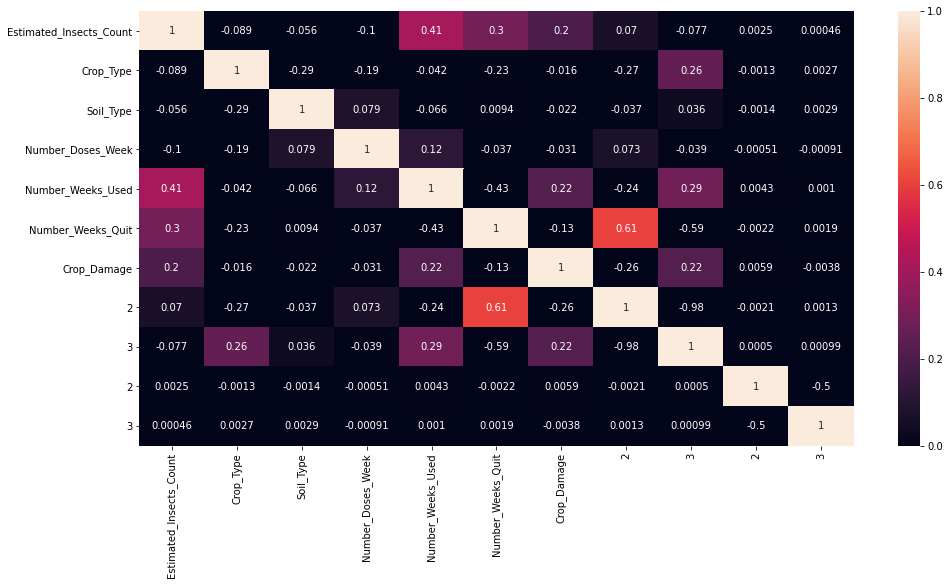

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df.drop('Crop_Damage',axis=1))
scaled_array = ss.transform(df.drop('Crop_Damage',axis=1))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(scaled_array)

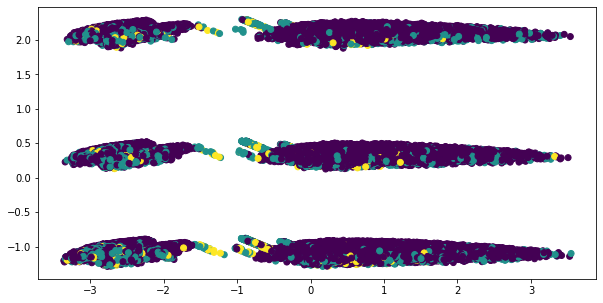

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_PCA[:,0],X_PCA[:,1],c = df['Crop_Damage'])

In [ ]:
df.columns

Index(['Estimated_Insects_Count',               'Crop_Type',
                     'Soil_Type',       'Number_Doses_Week',
             'Number_Weeks_Used',       'Number_Weeks_Quit',
                   'Crop_Damage',                         2,
                               3,                         2,
                               3],
      dtype='object')

In [ ]:
X = pd.DataFrame(scaled_array,columns=['Estimated_Insects_Count','Crop_Type','Soil_Type','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit',2,3,2,3])

In [ ]:
X.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,2,3,2,3
0,-1.426324,1.586343,-0.920021,-1.661912,-2.436394,-0.968629,-1.591622,-0.613728,-0.995083,-0.49955
1,-1.401591,1.586343,-0.920021,-1.661912,-2.436394,-0.968629,-1.591622,-0.613728,1.004941,-0.49955
2,-1.345057,1.586343,-0.920021,-1.661912,-2.436394,-0.968629,-1.591622,-0.613728,1.004941,-0.49955
3,-1.345057,1.586343,1.086932,-1.661912,-2.436394,-0.968629,-1.591622,-0.613728,1.004941,-0.49955
4,-1.244944,1.586343,-0.920021,-1.661912,-2.436394,-0.968629,-1.591622,-0.613728,1.004941,-0.49955


In [ ]:
y = df['Crop_Damage']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     22256
           1       0.35      0.29      0.32      3697
           2       0.09      0.09      0.09       705

    accuracy                           0.80     26658
   macro avg       0.44      0.43      0.43     26658
weighted avg       0.79      0.80      0.79     26658



In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     22256
           1       0.53      0.09      0.15      3697
           2       0.00      0.00      0.00       705

    accuracy                           0.84     26658
   macro avg       0.46      0.36      0.36     26658
weighted avg       0.78      0.84      0.78     26658



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df2 = pd.read_csv("test_pFkWwen.csv")

In [ ]:
df2.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [ ]:
id = df2['ID']

In [ ]:
df2.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [ ]:
a = df2['Number_Weeks_Used'].mean()
b = round(a,1)
b
a

28.70509388396952

In [ ]:
df2['Number_Weeks_Used'] =df2['Number_Weeks_Used'].fillna(b)

In [ ]:
df2.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [ ]:
df2.drop(['ID'],axis=1,inplace=True)

In [ ]:
df2.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,28.7,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [ ]:
Pesticide_Use_Category_dump_2 = pd.get_dummies(df2['Pesticide_Use_Category'],drop_first=True)
Season_dump_2 = pd.get_dummies(df2['Season'],drop_first=True)

In [ ]:
df2.drop(['Pesticide_Use_Category','Season'],axis=1,inplace=True)

In [ ]:
df2.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,188,1,1,0,28.7,0
1,410,1,1,0,0.0,0
2,626,1,0,0,0.0,0
3,731,1,0,0,0.0,0
4,789,0,0,0,0.0,0


In [ ]:
df2 = pd.concat([Pesticide_Use_Category_dump_2,Season_dump_2,df2],axis=1)

In [ ]:
df2.head()

,2,3,2,3,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,0,0,1,0,188,1,1,0,28.7,0
1,0,0,1,0,410,1,1,0,0.0,0
2,0,0,1,0,626,1,0,0,0.0,0
3,0,0,1,0,731,1,0,0,0.0,0
4,0,0,0,0,789,0,0,0,0.0,0


In [ ]:
ss.fit(df2)
scaled_array1 = ss.transform(df2)

In [ ]:
df2.columns

Index([                        2,                         3,
                               2,                         3,
       'Estimated_Insects_Count',               'Crop_Type',
                     'Soil_Type',       'Number_Doses_Week',
             'Number_Weeks_Used',       'Number_Weeks_Quit'],
      dtype='object')

In [ ]:
X1 = pd.DataFrame(scaled_array1,columns=[                        2,                         3,
                               2,                         3,
       'Estimated_Insects_Count',               'Crop_Type',
                     'Soil_Type',       'Number_Doses_Week',
             'Number_Weeks_Used',       'Number_Weeks_Quit'])

In [ ]:
y_pred1 = svc.predict(X1)

In [ ]:
result = pd.DataFrame(y_pred1,id,columns=['Crop_Damage'])

In [ ]:
result.head()

,Crop_Damage
ID,
F00000002,0
F00000007,0
F00000011,0
F00000013,0
F00000014,0


In [ ]:
result.to_csv('janatahack01_final.csv')